In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
data = pd.read_csv(r"C:\Users\omkar\Downloads\College ML\Salary_Data.csv")
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


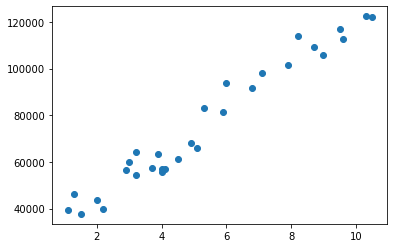

In [3]:

x = data['YearsExperience']
y = data['Salary']
plt.scatter(x,y)



In [4]:
p = np.polyfit(x,y,2)
f = np.poly1d(p)
print (f)



       2
16.39 x + 9259 x + 2.621e+04


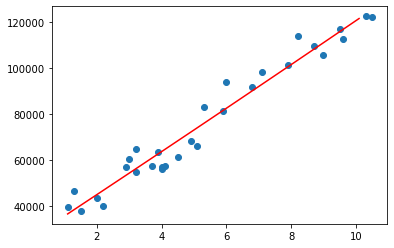

In [5]:
x_new = np.arange(min(x),max(x))
y_model = f(x_new)
plt.scatter(x,y)
plt.plot(x_new,y_model,'red')


In [6]:

#Polynomial regression using matrix manipulation
data = pd.read_csv(r"C:\Users\omkar\Downloads\College ML\Salary_Data.csv")
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
x = data['YearsExperience']
y = data['Salary']
n = 2
A = np.zeros((n+1,n+1))
b = np.zeros((n+1,1))



In [8]:
for i in range (n+1):
    print('row',i)
for j in range (n+1):
    print('column',j)
print('element', f'sum(x**{i,j}')
A[i,j] = sum(x**(i+j))
print('b element', f'sum(x**{i},y)')
b[i] = sum (x**(i)*y)
print('A',A)
print('b',b)
c = np.dot(np.linalg.pinv(A),b)
c = np.flip (c)
print('c',c)
c = c.ravel()
print('c after ravel',c)
f = np.poly1d(c)
print(f)
  

row 0
row 1
row 2
column 0
column 1
column 2
element sum(x**(2, 2)
b element sum(x**2,y)
A [[    0.        0.        0.   ]
 [    0.        0.        0.   ]
 [    0.        0.    72017.621]]
b [[0.00000000e+00]
 [0.00000000e+00]
 [1.07818645e+08]]
c [[1497.11478028]
 [   0.        ]
 [   0.        ]]
c after ravel [1497.11478028    0.            0.        ]
      2
1497 x


In [9]:
  

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly
poly_features = poly.fit_transform(x.values.reshape(-1, 1))



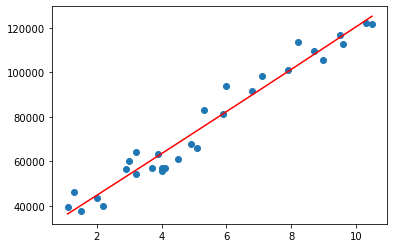

           29             28             27            26
3.642e+04 x  + 3.828e+04 x  + 4.014e+04 x  + 4.48e+04 x 
              25            24             23             22
 + 4.666e+04 x  + 5.32e+04 x  + 5.414e+04 x  + 5.601e+04 x 
              21            20             19             18
 + 5.601e+04 x  + 6.07e+04 x  + 6.258e+04 x  + 6.351e+04 x 
              17             16             15             14
 + 6.351e+04 x  + 6.445e+04 x  + 6.821e+04 x  + 7.198e+04 x 
              13             12             11             10
 + 7.386e+04 x  + 7.575e+04 x  + 8.142e+04 x  + 8.236e+04 x 
              9             8             7             6            5
 + 8.994e+04 x + 9.278e+04 x + 1.004e+05 x + 1.032e+05 x + 1.08e+05 x
              4             3             2
 + 1.109e+05 x + 1.157e+05 x + 1.166e+05 x + 1.233e+05 x + 1.252e+05


In [10]:
#Polynomial regression from sklearn
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()
n = np.poly1d(y_predicted)
print(n)